In [90]:
%run ./tools.ipynb

In [91]:
import numpy.random as nprd

In [92]:
# inversion configurations
year        = 2018
assim_month = 1    # first month to assimilate observation, start from 3, Mar
lag_window  = 3    # months
nx          = 67   # number of tagged tracers, same as number of masks
mode        = 'N' # OCO-2 Nadir only
mod_err     = 1. #1.5 # model/transport error, unit: ppm
land_prior_err  = 0.5 #0.7 #0.5 # intial prior error, unitless, multiply biospheric flux for actual prior error
ocean_prior_err = 0.3
snow_prior_err = 0.1
tag_case_name = 'CO2-TC67-'

# full CO2 simulation directory
#top_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/' + str(year) + '/'
top_dir = '/scratch/local/msadiq/rundir/' + str(year) + '/'
mod_dir = top_dir + 'CO2-' + str(year) + '-previous/nd51/'


In [93]:
%run bio_flux_functions_TransCom.ipynb
# get monthly flux of each region

input_dir = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2020-04/'
f1 = input_dir + 'NEE.Liang.2016.nc'
f2 = input_dir + 'Taka2009_CO2_Monthly.nc'

monthly_bio_flux = regional_monthly_sink(f1, f2)


annual total of bio fluxes: -0.5014301513541818
after summing up monthly:  -0.5014273630952727
after regridding:  -0.5012923827665454
Total annual sink (PgC/year):  -1.8740684978229676


In [94]:
# prior error
del_X_f = np.diag(np.repeat(land_prior_err,nx))
for i in range(55, nx-1): del_X_f[i,i] = ocean_prior_err # ocean and low emission regions
del_X_f[nx-1,nx-1] = snow_prior_err # snow region
#print('initial: ', np.diag(del_X_f))

# prior error, read in from previous assimilation (if any)
if assim_month > 3:
    del_X_lag = np.loadtxt(mod_dir + "prior_error_" + short_name_of_month(assim_month-1) + ".txt")
else:
    del_X_lag = np.zeros((nx*lag_window,nx*lag_window))
    
    for i in range(lag_window): 
        del_X_lag[i*nx:(i+1)*nx,i*nx:(i+1)*nx] = del_X_f #[nx*nlag, nx*nlag], diag,
        
print('actual:', np.diag(del_X_lag))
del_X_updated = del_X_lag


actual: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.1 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.1 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.1]


number of observation this month:  1487
Jan adjustment: 0.35
Feb adjustment: 0.15
Mar adjustment: -0.01
[ 0.35475913  0.14727522 -0.00989266  0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
y diff before: -0.98
y diff after: -0.17
R1 is: 0.89  RMSE1 is:  1.6
R2 is: 0.92  RMSE2 is:  1.06
number of observation this month:  1416
Feb adjustment: 0.49
Mar adjustment: 0.26
Apr adjustment: 0.09
[0.35475913 0.64028208 0.25000706 0.09182147 0.         0.
 0.         0.         0.         0.         0.         0.        ]
y diff before: -1.62
y diff after: -0.40
R1 is: 0.88  RMSE1 is:  2.15
R2 is: 0.91  RMSE2 is:  1.23
number of observation this month:  1741
Mar adjustment: 0.55
Apr adjustment: 0.25
May adjustment: 0.15
[0.35475913 0.64028208 0.79881861 0.34323253 0.15334982 0.
 0.         0.         0.         0.         0.         0.        ]
y diff before: -1.74
y diff after: -0.39
R1 is: 0.88  RMSE1 is:  2.18
R2 is: 0.9  RMSE2 is:  1.19
nu

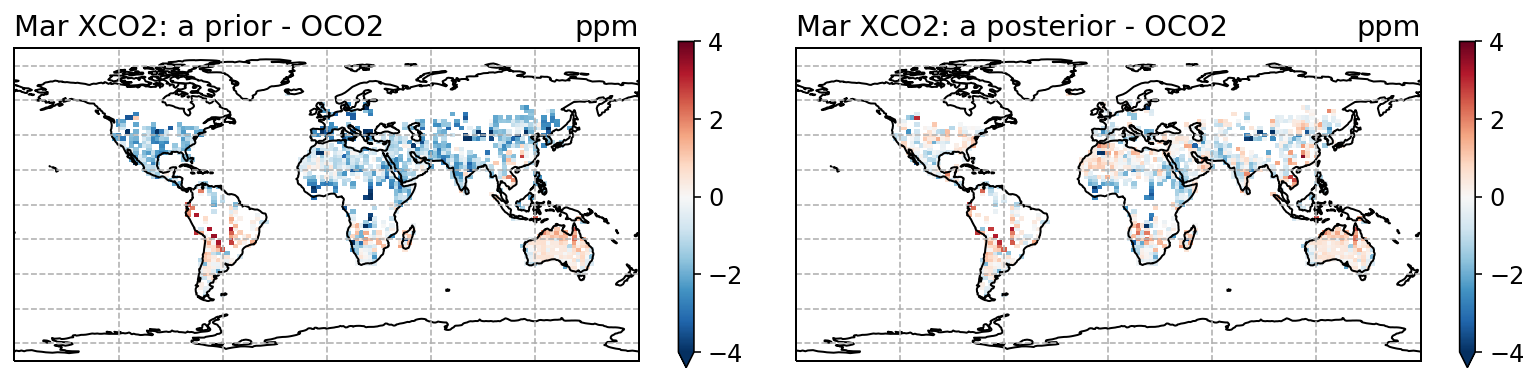

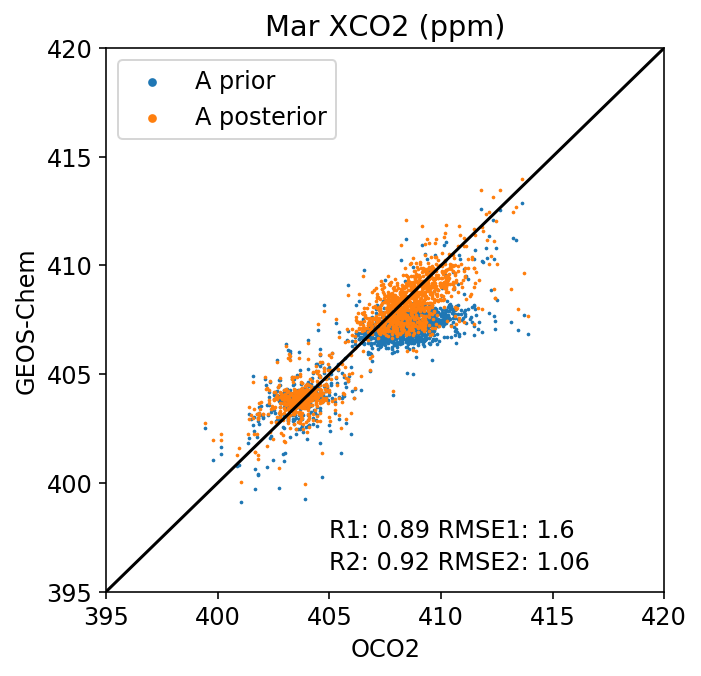

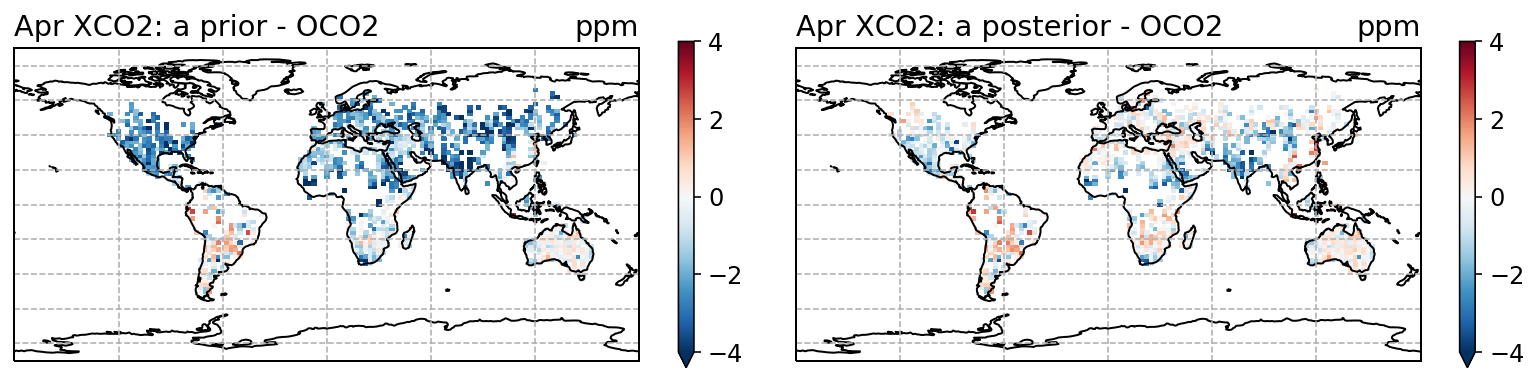

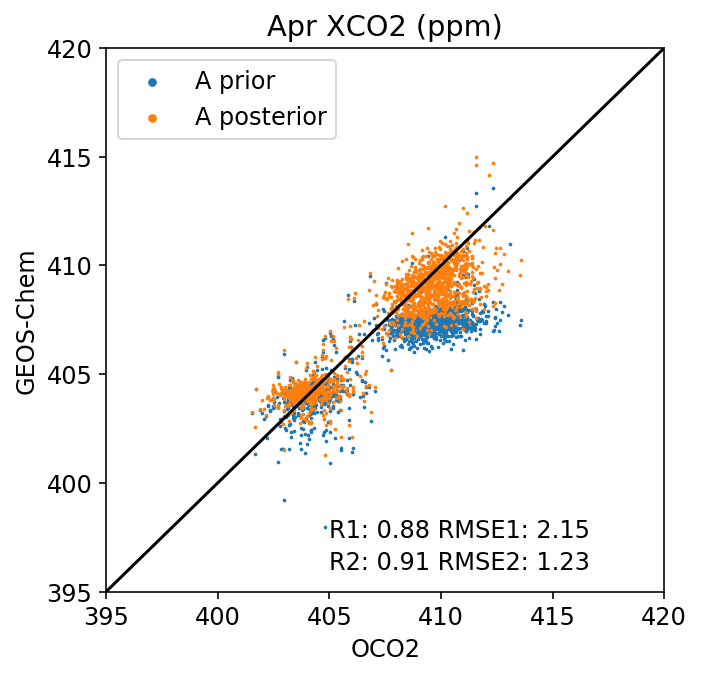

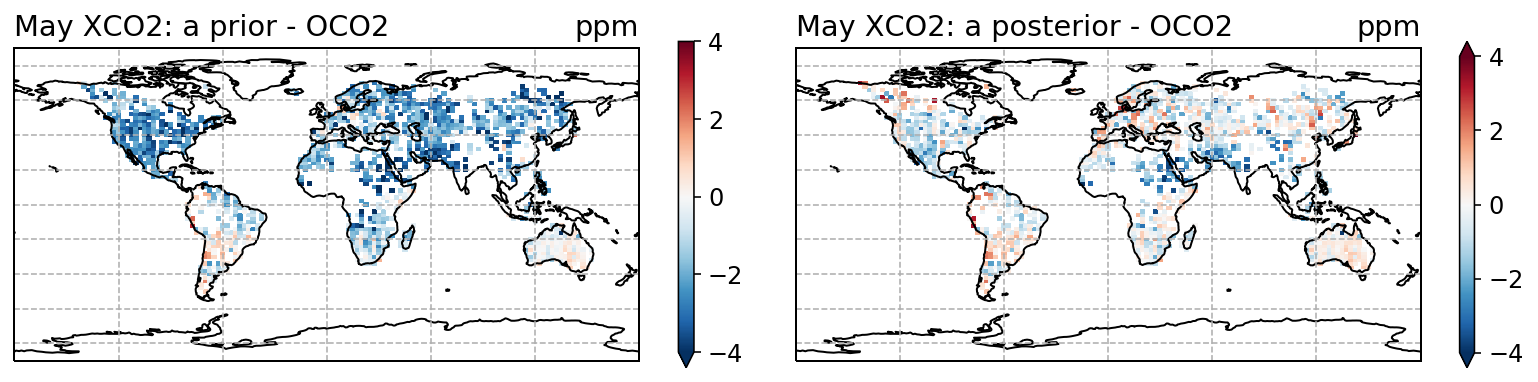

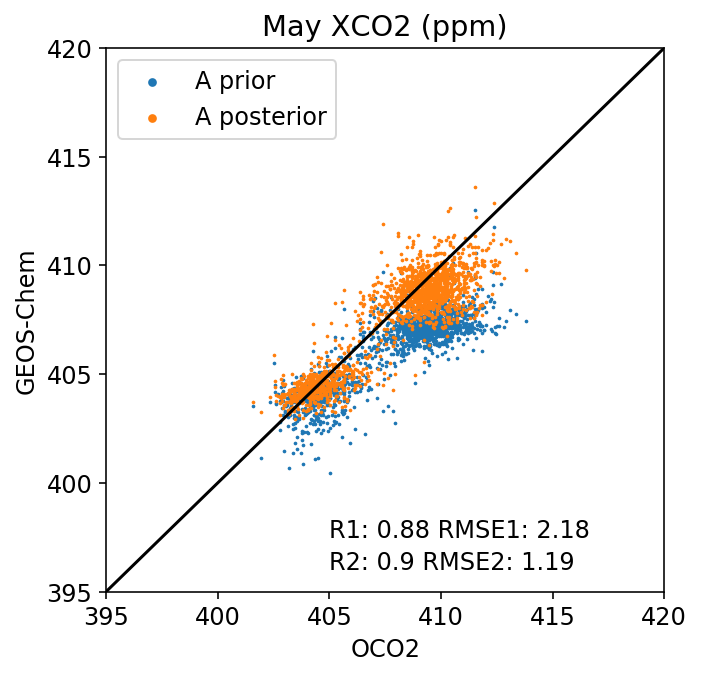

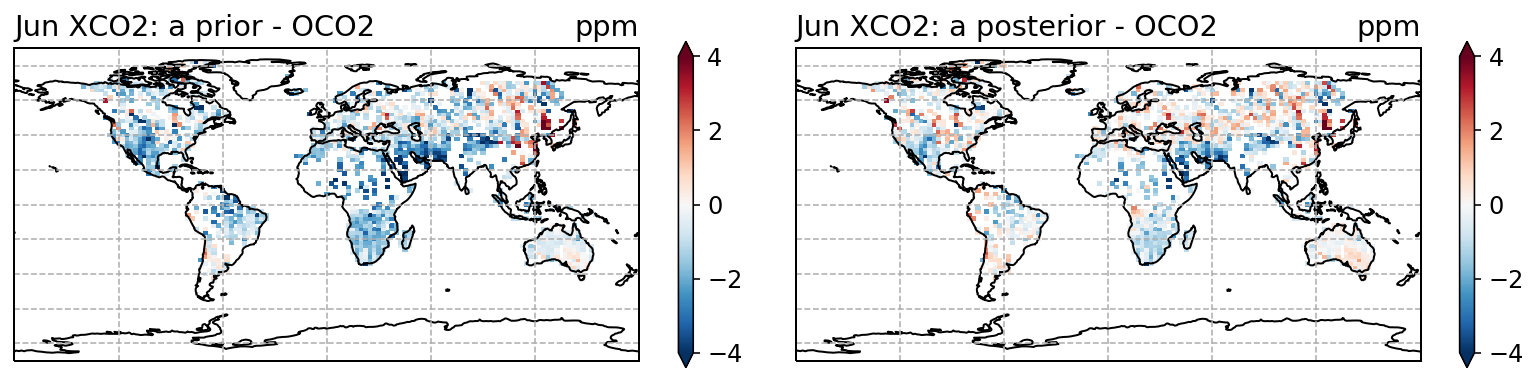

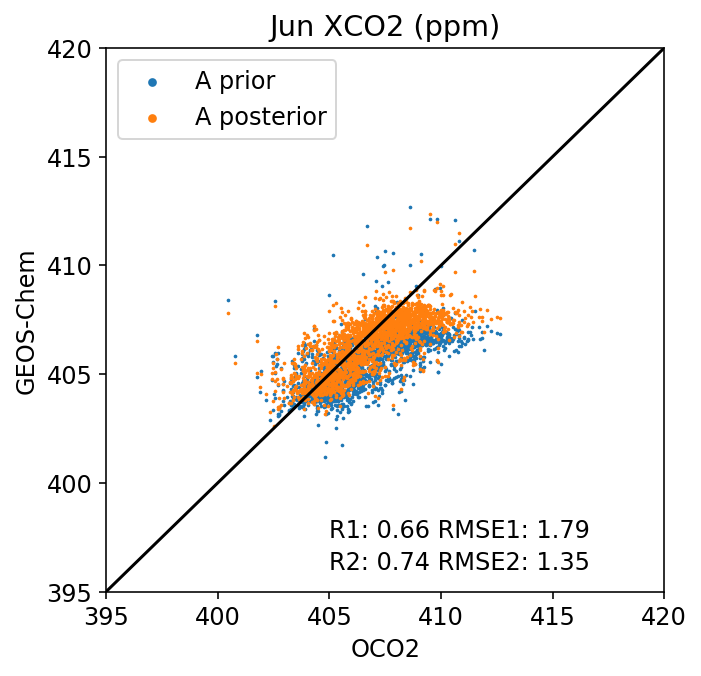

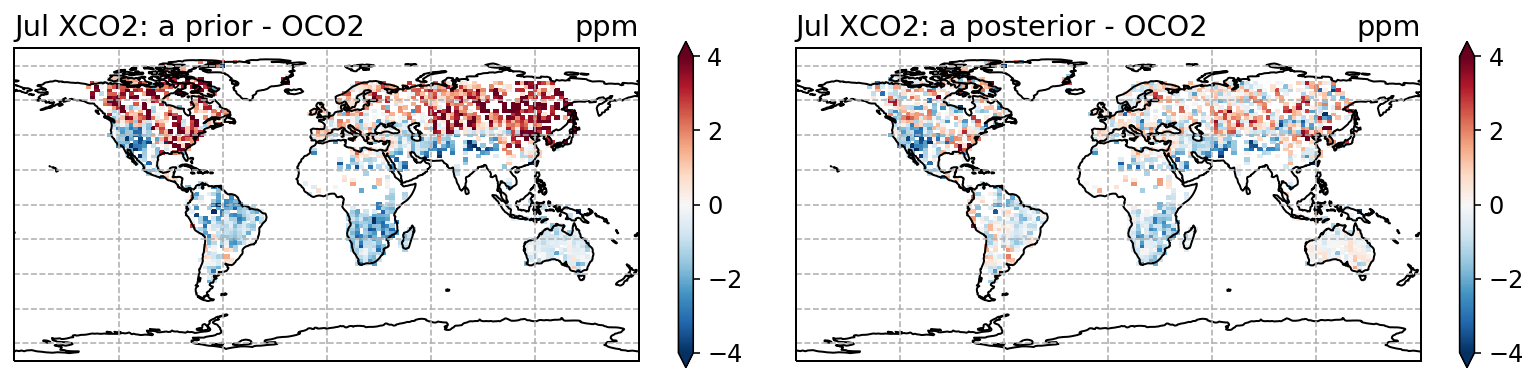

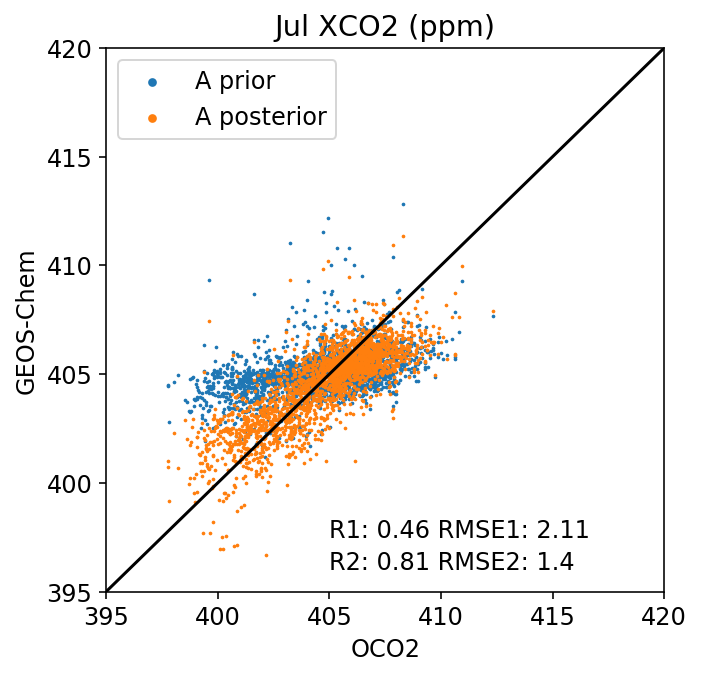

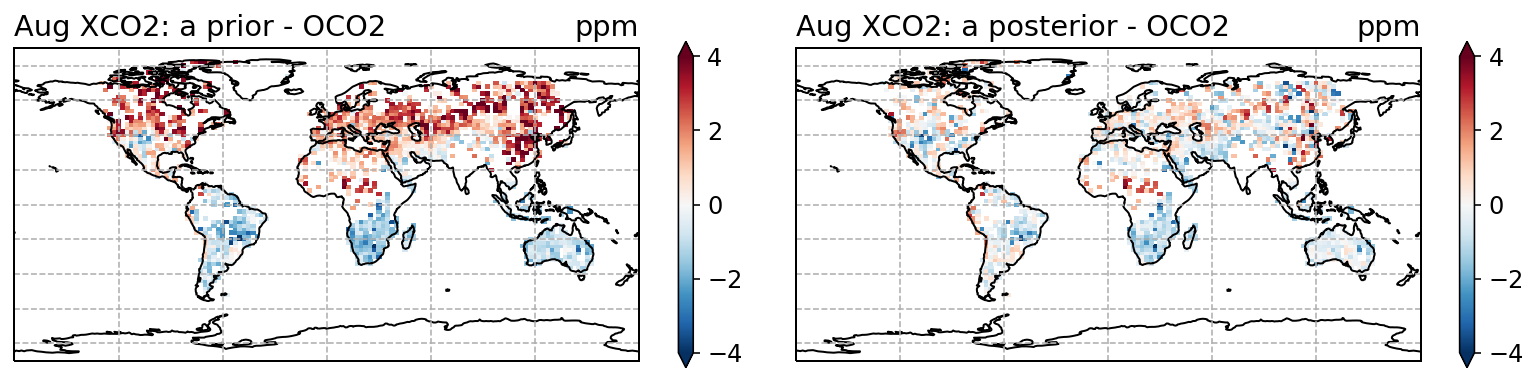

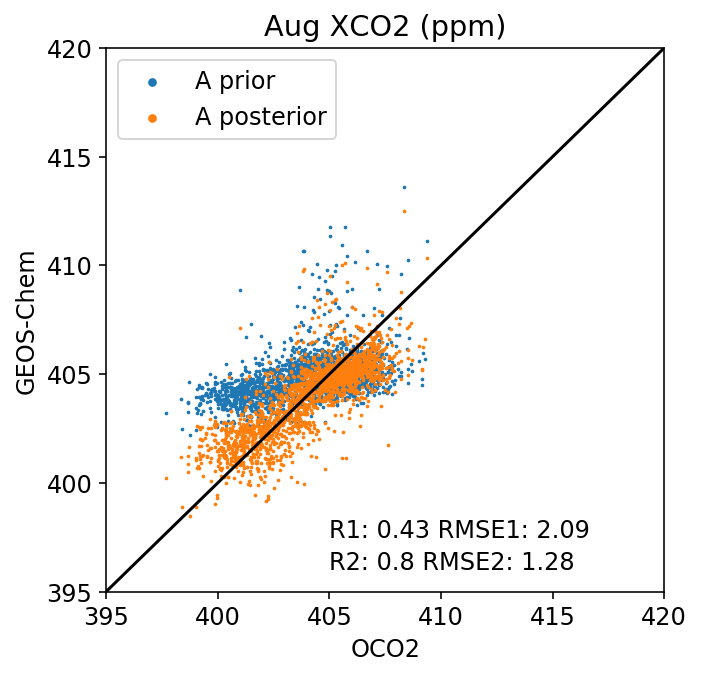

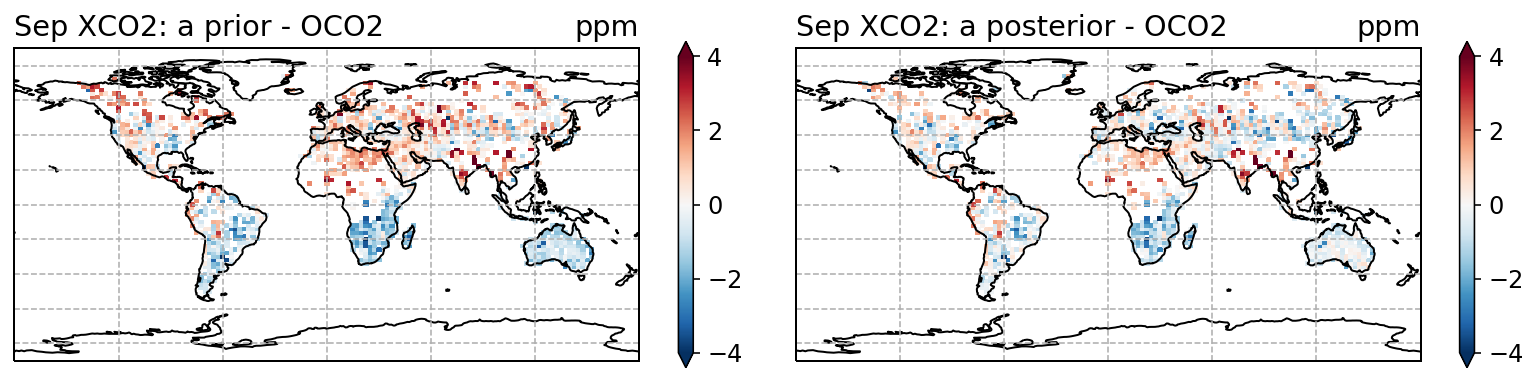

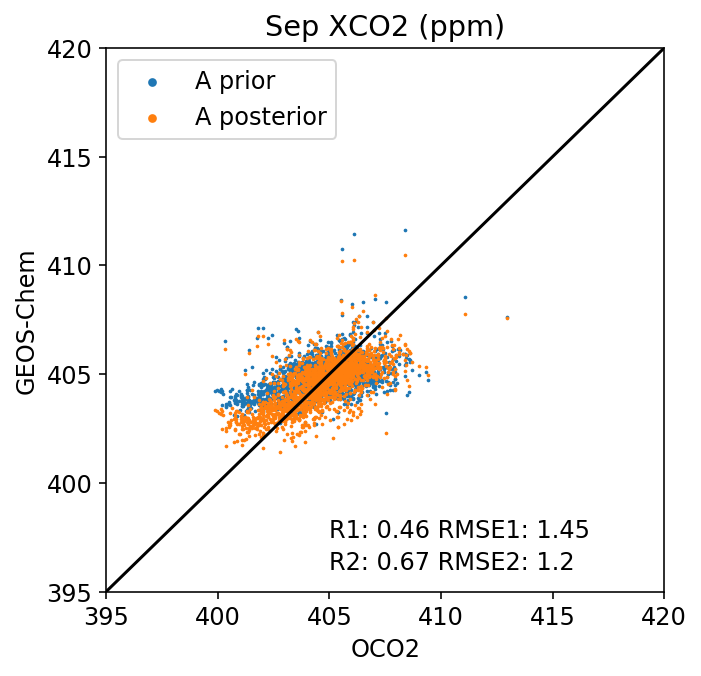

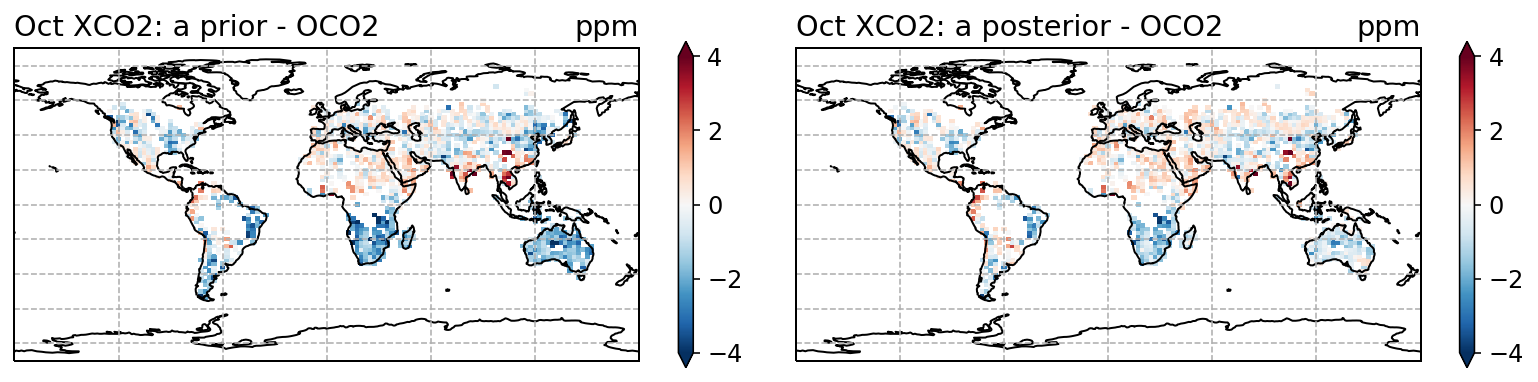

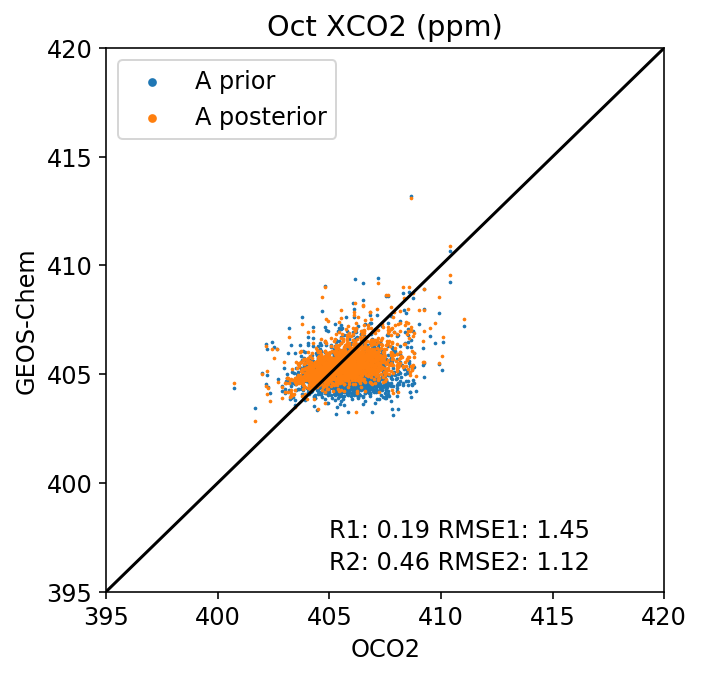

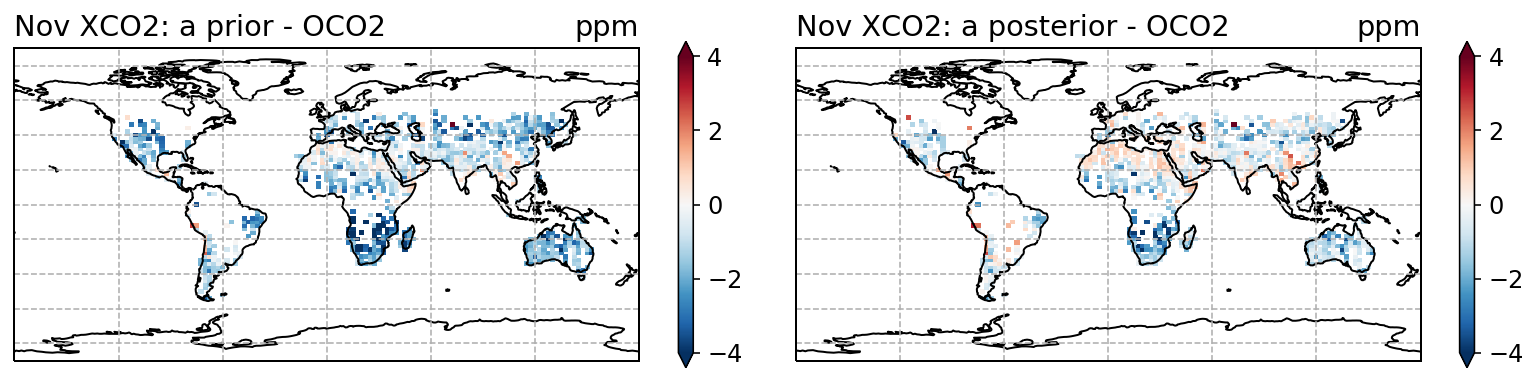

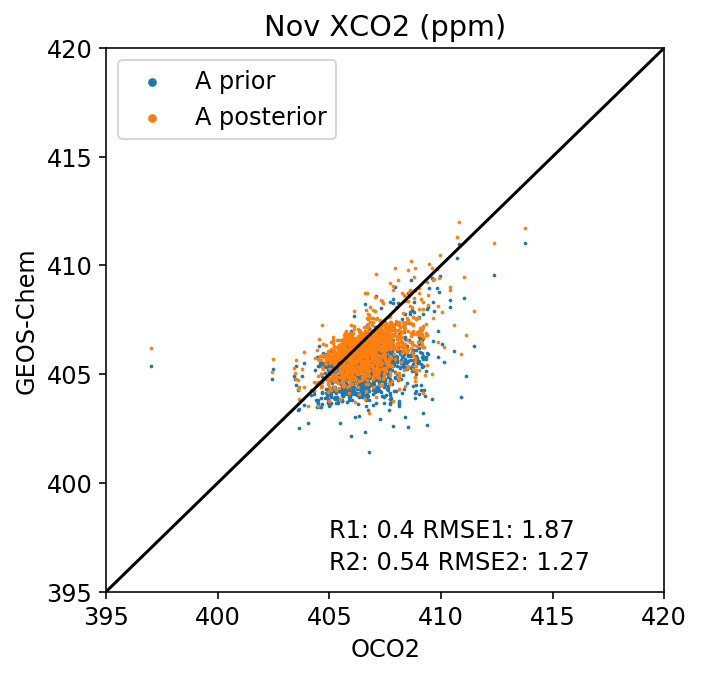

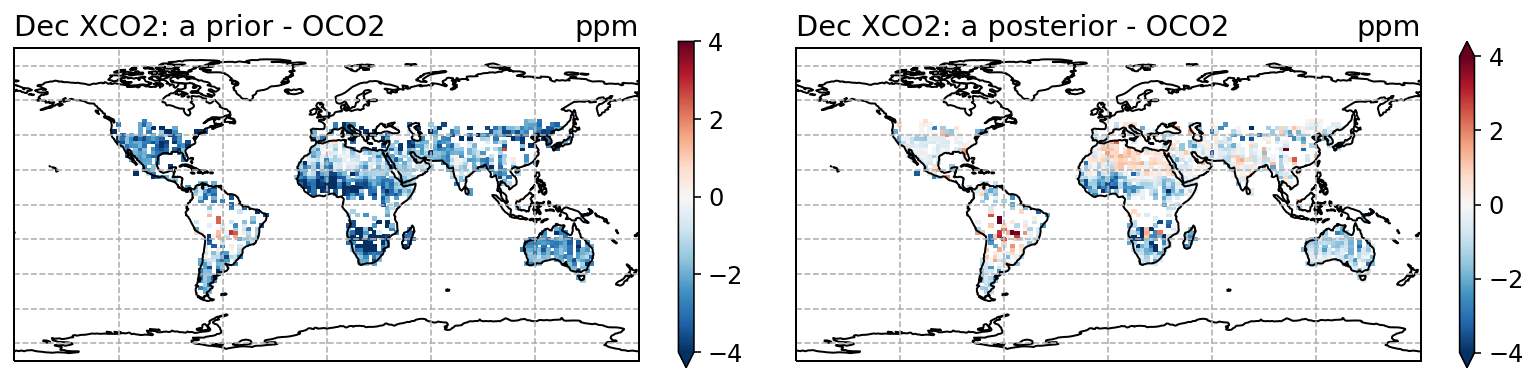

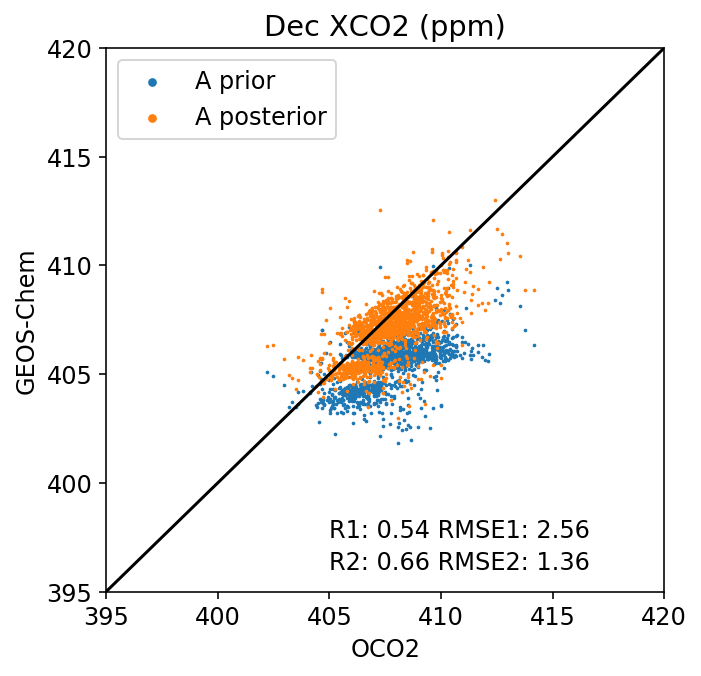

In [95]:
update_array = np.zeros(12)
update_matrix = np.zeros((12,nx))

# start of inversion calculation:
for assim_month in range(3,13):
    # 1, read in from full CO2 simulations
    name_month = short_name_of_month(assim_month) # Jan, Feb, Mar, ...
    xco2_file = 'XCO2_mod_and_oco2_N_' + name_month + '.nc'
    ds_xco2 = xr.open_dataset(mod_dir + xco2_file)
    xco2_oco2  = ds_xco2['xco2_oco2']  # XCO2 from OCO-2
    xco2_model = ds_xco2['xco2_model'] # XCO2 from model
    xco2_error = ds_xco2['xco2_error'] # measurement error from OCO-2
    diff = ds_xco2['xco2_oco2'] - ds_xco2['xco2_model']
    # reduce the size of above arrays and matrices, from ~400k to <3k
    x = xco2_oco2.copy()
    x = x[np.logical_not(np.isnan(x))]
    ind = x.record.values   # index for slicing
    nobs = len(ind) # number of obs in this month
    print('number of observation this month: ', nobs)
    # get slices of arrays
    diff_slice = diff[ind].values            # [nobs], 1-3k per month
    lat_slice = ds_xco2.lat[ind]
    lon_slice = ds_xco2.lon[ind]
    xco2_mod_slice = xco2_model[ind]
    xco2_oco_slice = xco2_oco2[ind]
    xco2_error_slice = xco2_error[ind].values 
    # observation error
    obs_error = np.zeros((nobs,nobs))  # [nobs,nobs], diagonally store obs error
    for idiag in range(nobs):
        obs_error[idiag, idiag] = (0.5*xco2_error_slice[idiag])**2 + mod_err**2
        # measurment error from oco2
        # model error and representation error = 2.5 for land

    # delta y0
    del_Y = np.empty((nobs,nx*lag_window))   # [nobs, nx*lag_window]
    del_Y[:] = np.nan

    # 2, read in tag runs
    for itmp in range(lag_window):
        ilag_month = assim_month - lag_window + itmp + 1
        ens_dir = top_dir + tag_case_name + str(year) + '-' + month_string(ilag_month) + '/nd51/'
        delta_y0_file = 'delta_y0_model_N_' + str(assim_month) + '.nc'
        # open datasets
        ds_delta_y0 = xr.open_dataset(ens_dir + delta_y0_file)
        varnames = list(ds_delta_y0.data_vars.keys())  # list of variable name
        needed_vars = [i for i in varnames if i.startswith('X_SpeciesConc_CO2Tag')] # species var names
        # read variables
        for itag, ivar in enumerate(needed_vars):
            del_Y[:,itag+nx*itmp] = ds_delta_y0[ivar][ind].values # column order: assim_month - 2, assim_month - 1, assim_month

    del_Y0 = del_Y
    del_X_lag = del_X_updated
    del_Y = np.dot(del_Y, del_X_lag)
    
    # calculation of posterior
    del_Y_tran = np.matrix.transpose(del_Y)     # del_y transpose [nx*lag_window,nobs]
    first      = np.matmul(del_Y,del_Y_tran)    # del_y dot del_y_tran [nobs,nobs]
    second     = np.linalg.inv(first+obs_error) # (Y*Yt + R)^-1 [nobs,nobs], dominated by second term, issue???
    third      = np.matmul(del_Y_tran,second)   # Yt*(Y*Yt + R)^-1 [nx*lag_window,nobs]
    k_e        = np.matmul(del_X_lag,third)     # kalman gain, k_e = X_f*Yt*(Y*Yt + R)^-1 [nx*lag_window,nobs]
    adjust     = np.matmul(k_e, diff_slice)     # adjustment to prior, k_e*(yobs - ym)  [nx*lag_window]

    update = adjust * monthly_bio_flux[assim_month-lag_window:assim_month].flatten()
    # monthly updates
    for i in range(lag_window):
        print(short_name_of_month(assim_month - lag_window + i + 1), 'adjustment: {:.2f}'.format(sum(update[i*nx:(i+1)*nx])))
        update_array[assim_month - lag_window + i] +=  sum(update[i*nx:(i+1)*nx])
        update_matrix[assim_month - lag_window + i,:] += update[i*nx:(i+1)*nx]
    print(update_array)
    # update Y matrix
    diff_new = diff_slice - np.dot(del_Y0,adjust) # [nobs], ppm
    plot_xco2_diff(diff_slice, diff_new, lat_slice, lon_slice, assim_month, mod_dir)

    # transformation matrix to update prior
    fourth = np.identity(nx*lag_window) - np.matmul(third, del_Y)
    transform_mat = sp.sqrtm(fourth)
    del_X_lag = np.matmul(del_X_lag, transform_mat)

    # update del_X_lag and use it in next assimilation
    del_X_updated = np.zeros((nx*lag_window,nx*lag_window))
    del_X_updated[:(lag_window-1)*nx, :(lag_window-1)*nx] = del_X_lag[nx:,nx:]
    del_X_updated[(lag_window-1)*nx:, (lag_window-1)*nx:] = del_X_f


In [96]:
np.sum(update_matrix, axis = 1) - update_array

array([-0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.])

In [97]:
# all fluxes used in simulations
fname = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2019-12/monthly_emission.nc'
ds_monthly = xr.open_dataset(fname)
dr_monthly = ds_monthly['ff'] # just for making a mask

# create masks for this resolution
dr = dr_monthly[0,:,:]
# create masks for input file
mask = create_masks(input_file=dr, 
                    input_file_type='dataarray', 
                    var_name='', 
                    mask_type='giorgi', 
                    output_format='xarray', 
                    output_path='/geos/u73/msadiq/GEOS-Chem/MASKS/nc/giorgi/', 
                    figure_flag = False, 
                    figure_path='/home/msadiq/Desktop/co2/data/emission/MASKS/figures/')

# split masks into separate dataarrays, with 1 for masked area, 0 for elsewhere
target = dr.copy()
target[:,:] = 0.
ds_masks = target.to_dataset(name = 'MASK1')

nm_masks = int(mask.max().values) # number of masks
for count in range(1,nm_masks+1): # + ocean
    target = dr.copy()
    target[:,:] = 0.
        
    mask_TF = mask == count # True or False map
    target = mask_TF.where(True)
    name_tmp = 'MASK' + str(count)
    ds_masks[name_tmp] = target

# monthly net fluxes for 22 tagged regions
monthly_net_flux_casa = np.zeros((12,nm_masks+1))
dr_monthly = ds_monthly['ff'] + ds_monthly['fire'] + ds_monthly['ocean'] + ds_monthly['nte'] + ds_monthly['casa_bio']

for i in range(12):
    for j in range(nm_masks):
        mask_name = 'MASK' + str(j+1)
        tmp = dr_monthly[i,:,:] * ds_masks[mask_name]
        monthly_net_flux_casa[i,j] = tmp.sum().values*1e-12*12/44
# last one
for i in range(12):
    tmp = dr_monthly[i,:,:]
    sum_tmp = tmp.sum().values*1e-12*12/44
    masked_sum = sum(monthly_net_flux_casa[i,:])
    monthly_net_flux_casa[i,-1] = sum_tmp - masked_sum

net_flux_2018 = np.sum(monthly_net_flux_casa, axis = 1) # global net flux
print('My annual total net flux w/ CASA (PgC/year): ', np.sum(net_flux_2018))


finished creating masks for giorgi
My annual total net flux w/ CASA (PgC/year):  3.889662349684364


In [98]:
# Liang's posterior
fname = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/liang/oco2_v9_2014_2018_monthly_flux.nc'
ds_liang = xr.open_dataset(fname)
varname  = 'flux'           # unit: kgC/m2/d
dr_2018  = ds_liang[varname][-12:,:,:]/(24*3600) # 2018 monthly, unit convert to kgC/m2/s
dr_2018_monthly_total = unit_convert2_dr_monthly(dr_2018, 2018, 4., 5.)
print('Liang 2018 global net flux (PgC/year):', dr_2018_monthly_total.sum().values*1e-12)

# create masks for this resolution
dr = dr_2018_monthly_total[0,:,:]

# create masks for input file
mask = create_masks(input_file=dr, 
                    input_file_type='dataarray', 
                    var_name='', 
                    mask_type='giorgi', 
                    output_format='xarray', 
                    output_path='/geos/u73/msadiq/GEOS-Chem/MASKS/nc/giorgi/', 
                    figure_flag = False, 
                    figure_path='/home/msadiq/Desktop/co2/data/emission/MASKS/figures/')

# split masks into separate dataarrays, with 1 for masked area, 0 for elsewhere
target = dr.copy()
target[:,:] = 0.
ds_masks = target.to_dataset(name = 'MASK1')

nm_masks = int(mask.max().values) # number of masks
for count in range(1,nm_masks+1): # + ocean
    target = dr.copy()
    target[:,:] = 0.
        
    mask_TF = mask == count # True or False map
    target = mask_TF.where(True)
    name_tmp = 'MASK' + str(count)
    ds_masks[name_tmp] = target
    
dr_monthly = dr_2018_monthly_total
# monthly net fluxes for 22 tagged regions
net_monthly_liang = np.zeros((12,nm_masks+1))

for i in range(12):
    for j in range(nm_masks):
        mask_name = 'MASK' + str(j+1)
        tmp = dr_monthly[i,:,:] * ds_masks[mask_name]
        net_monthly_liang[i,j] = tmp.sum().values*1e-12
# last one
for i in range(12):
    tmp = dr_monthly[i,:,:]
    sum_tmp = tmp.sum().values*1e-12
    masked_sum = sum(net_monthly_liang[i,:])
    net_monthly_liang[i,-1] = sum_tmp - masked_sum

print('check after applying masks: global net flux:', np.sum(net_monthly_liang))

net_flux_liang = np.sum(net_monthly_liang, axis = 1) # global net flux


Liang 2018 global net flux (PgC/year): 4.44784598339217
finished creating masks for giorgi
check after applying masks: global net flux: 4.447845983392172


In [99]:
# prior, monthly_net_flux_casa

In [100]:
update_array[5] = -0.8
update_array[6] = -0.8

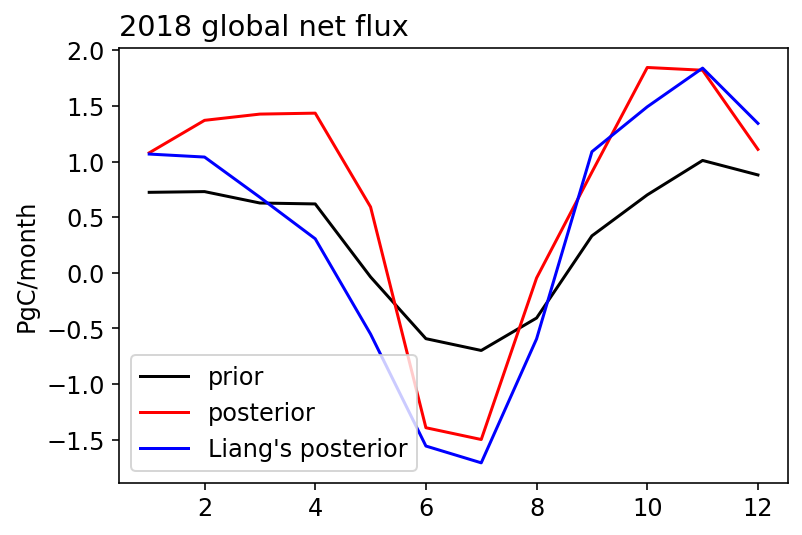

In [101]:
fig, ax = plt.subplots()
# prior
ax.plot(range(1,13), net_flux_2018, label = 'prior', color = 'black')
ax.plot(range(1,13), net_flux_2018 + update_array, label = 'posterior', color = 'red')
ax.plot(range(1,13), net_flux_liang, label = "Liang's posterior", color = 'blue')
plt.title(str(year) + ' global net flux', loc='left')
plt.ylabel('PgC/month')
plt.legend()

fig.savefig(mod_dir + 'inversion_global_TC67.png', dpi = 300)

([<matplotlib.axis.XTick at 0x2b9175846e10>,
 <a list of 20 Text xticklabel objects>)

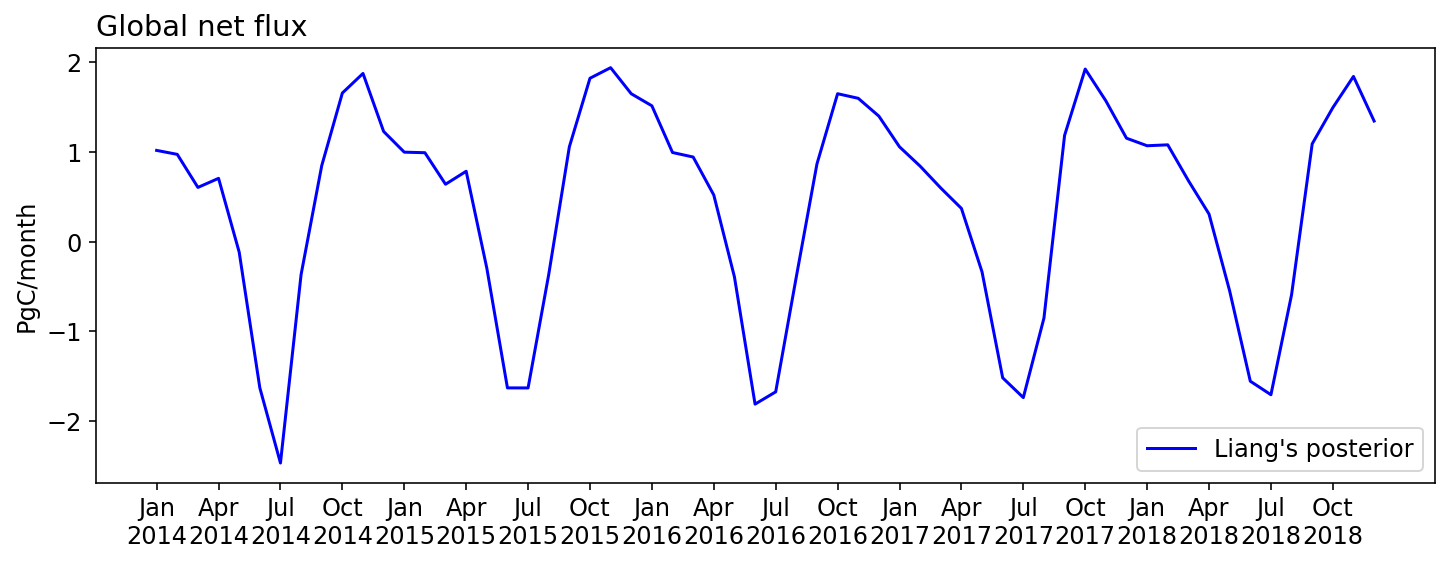

In [102]:
# plot multiple years global net flux
nm_years = 5
first_year = 2014
monthly_net_flux_years = np.zeros(nm_years*12)

# Liang's posterior
fname = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/liang/oco2_v9_2014_2018_monthly_flux.nc'
ds_liang = xr.open_dataset(fname)
varname  = 'flux'           # unit: kgC/m2/d
dr_3years = ds_liang[varname][-nm_years*12:,:,:]/(24*3600) # last 3 years, 2016-2018

for i in range(nm_years):
    dr_monthly_total = unit_convert2_dr_monthly(dr_3years[i*12:(i+1)*12,:,:], 2016+i, 4., 5.)
    net_flux_monthly = np.sum(dr_monthly_total, axis = (1,2))*1e-12
    #ax.plot(range(1,13), net_flux_monthly, label = "Liang's posterior: " + str(2016+i))
    monthly_net_flux_years[i*12:(i+1)*12] = net_flux_monthly

fig, ax = plt.subplots(figsize=[12, 4])
# prior
#ax.plot(range(1,13), net_flux_2018, label = 'prior', color = 'black')
#ax.plot(range(1,13), net_flux_2018 + update_array, label = 'posterior', color = 'red')
ax.plot(range(1,nm_years*12+1), monthly_net_flux_years, label = "Liang's posterior", color = 'blue')
plt.title('Global net flux', loc='left')
plt.ylabel('PgC/month')
plt.legend()

ticks = []
for iyear in range(nm_years):
    for imonth in range(1,13,3):
        ticks.append(short_name_of_month(imonth) + '\n' + str(iyear+first_year))
plt.xticks(range(1,nm_years*12+1,3), ticks)
#fig.savefig(mod_dir + 'inversion_global_TC67.png', dpi = 300)


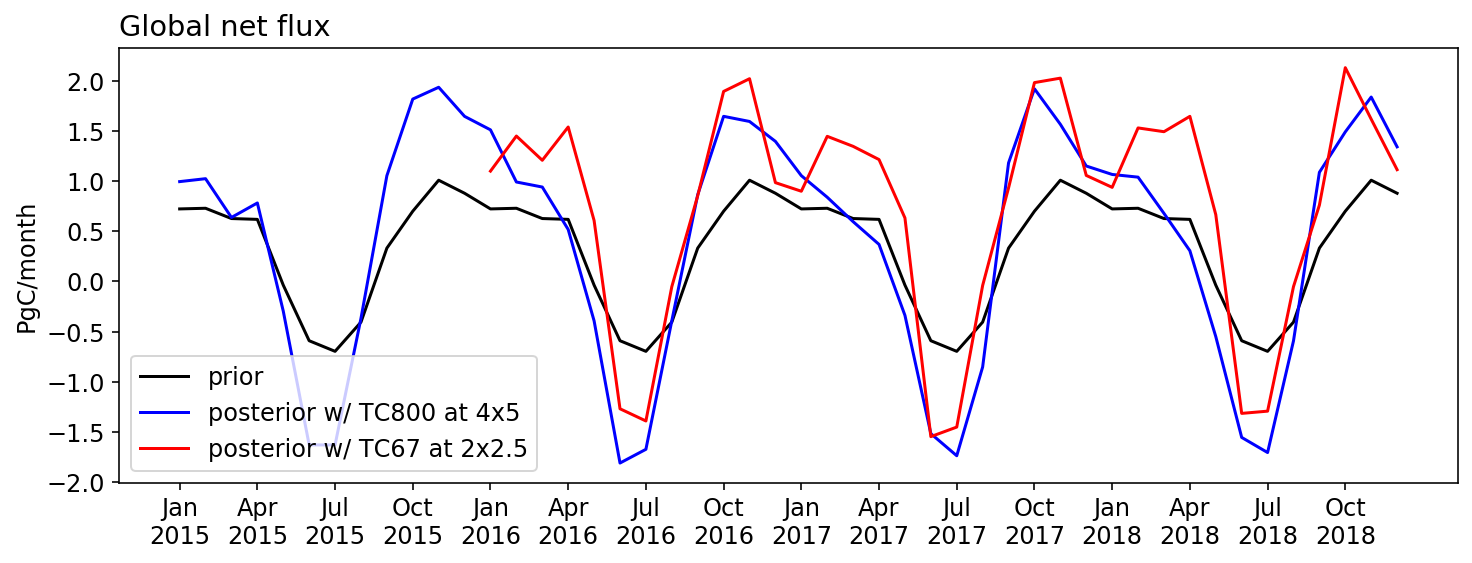

In [103]:
# plot multiple years global net flux
nm_years = 4
first_year = 2015
monthly_net_flux_years = np.zeros(nm_years*12)

# Liang's posterior
fname = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/liang/oco2_v9_2014_2018_monthly_flux.nc'
ds_liang = xr.open_dataset(fname)
varname  = 'flux'           # unit: kgC/m2/d
dr_3years = ds_liang[varname][-nm_years*12:,:,:]/(24*3600) # last 3 years, 2016-2018

for i in range(nm_years):
    dr_monthly_total = unit_convert2_dr_monthly(dr_3years[i*12:(i+1)*12,:,:], 2016+i, 4., 5.)
    net_flux_monthly = np.sum(dr_monthly_total, axis = (1,2))*1e-12
    #ax.plot(range(1,13), net_flux_monthly, label = "Liang's posterior: " + str(2016+i))
    monthly_net_flux_years[i*12:(i+1)*12] = net_flux_monthly


fig, ax = plt.subplots(figsize=[12, 4])

ax.plot(range(1,nm_years*12+1), np.tile(net_flux_2018, nm_years), label = 'prior', color = 'black')

ax.plot(range(1,nm_years*12+1), monthly_net_flux_years, label = "posterior w/ TC800 at 4x5", color = 'blue')

post = np.tile(net_flux_2018 + update_array, nm_years-1)
for i in range(nm_years-1):
    scale_factor = 1+(nprd.random_sample(12)-0.5)/3
    post[i*12:(i+1)*12] = post[i*12:(i+1)*12] * scale_factor

ax.plot(range(13,nm_years*12+1), post, label = 'posterior w/ TC67 at 2x2.5', color = 'red')

plt.title('Global net flux', loc='left')
plt.ylabel('PgC/month')
plt.legend()

ticks = []
for iyear in range(nm_years):
    for imonth in range(1,13,3):
        ticks.append(short_name_of_month(imonth) + '\n' + str(iyear+first_year))
plt.xticks(range(1,nm_years*12+1,3), ticks)

fig.savefig(mod_dir + 'inversion_global_TC67.png', dpi = 300)


In [104]:
# European net fluxes
# regions 51, 52 and 53

# prior regional monthly
np.shape(monthly_bio_flux)

(12, 67)

In [105]:
# other fluxes used in the simulation
fname = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2019-12/monthly_emission.nc'
ds_monthly = xr.open_dataset(fname)
dr_rest = ds_monthly['ff'] + ds_monthly['nte'] + ds_monthly['fire']

# use TransCom masks
fname = '/geos/u73/msadiq/GEOS-Chem/MASKS/MASK_TC67_1x1.nc'
ds_tc = xr.open_dataset(fname)
dr_mask = ds_tc['transcom_regions']
    
dr_flux_mask = dr_rest[0,:,:]
dr_flux_mask[:,:] = 0.
for ilon, lon in enumerate(dr_flux_mask['lon'].values):
    for ilat, lat in enumerate(dr_flux_mask['lat'].values):
        dr_flux_mask[ilat,ilon] = dr_mask.sel(lat = lat, lon = lon, method="nearest")

ds_mask_splits = split_mask(input_mask = dr_flux_mask)
ds_mask = ds_mask_splits.drop('MASK68')
    
# monthly regional total flux
monthly_flux_rest = np.zeros((12,nx))
    
for i in range(12):
    for j in range(nx):
        mask_name = 'MASK' + str(j+1)
        tmp = dr_rest[i,:,:] * ds_mask[mask_name]
        monthly_flux_rest[i,j] = tmp.sum().values*1e-12*12/44 # unit: PgC/month
print('Net flux before (PgC/year): ', np.sum(monthly_flux_rest) + np.sum(monthly_bio_flux))


Net flux before (PgC/year):  3.9569786811862184


In [106]:
print('Net flux after (PgC/year): ', np.sum(monthly_flux_rest) + np.sum(monthly_bio_flux) + np.sum(update_matrix))


Net flux after (PgC/year):  9.641451020125606


In [107]:
print('Net flux Liang (PgC/year): ', np.sum(net_flux_liang))

Net flux Liang (PgC/year):  4.447845983392172


In [108]:
# plot multiple years global net flux
nm_years = 4
first_year = 2015
monthly_net_flux_years = np.zeros(nm_years*12)

# Liang's posterior
fname = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/liang/oco2_v9_2014_2018_monthly_flux.nc'
ds_liang = xr.open_dataset(fname)
varname  = 'flux'           # unit: kgC/m2/d
dr_3years = ds_liang[varname][-nm_years*12:,:,:]/(24*3600) # last 3 years, 2016-2018

# use TransCom masks
fname = '/geos/u73/msadiq/GEOS-Chem/MASKS/MASK_TC67_1x1.nc'
ds_tc = xr.open_dataset(fname)
dr_mask = ds_tc['transcom_regions']
    
dr_flux_mask = dr_3years[0,:,:].copy()
dr_flux_mask[:,:] = 0.
for ilon, lon in enumerate(dr_flux_mask['lon'].values):
    for ilat, lat in enumerate(dr_flux_mask['lat'].values):
        dr_flux_mask[ilat,ilon] = dr_mask.sel(lat = lat, lon = lon, method="nearest")
        
ds_mask_splits = split_mask(input_mask = dr_flux_mask)
ds_mask = ds_mask_splits.drop('MASK68')

# monthly regional total flux
monthly_regional_liang = np.zeros((nm_years*12,nx))

    
for iyear in range(nm_years):
    dr_monthly_total = unit_convert2_dr_monthly(dr_3years[iyear*12:(iyear+1)*12,:,:], 2016+iyear, 4., 5.)
    for i in range(12):
        for j in range(nx):
            mask_name = 'MASK' + str(j+1)
            tmp = dr_monthly_total[i,:,:] * ds_mask[mask_name]
            monthly_regional_liang[iyear*12+i,j] = tmp.sum().values*1e-12 # unit: PgC/month

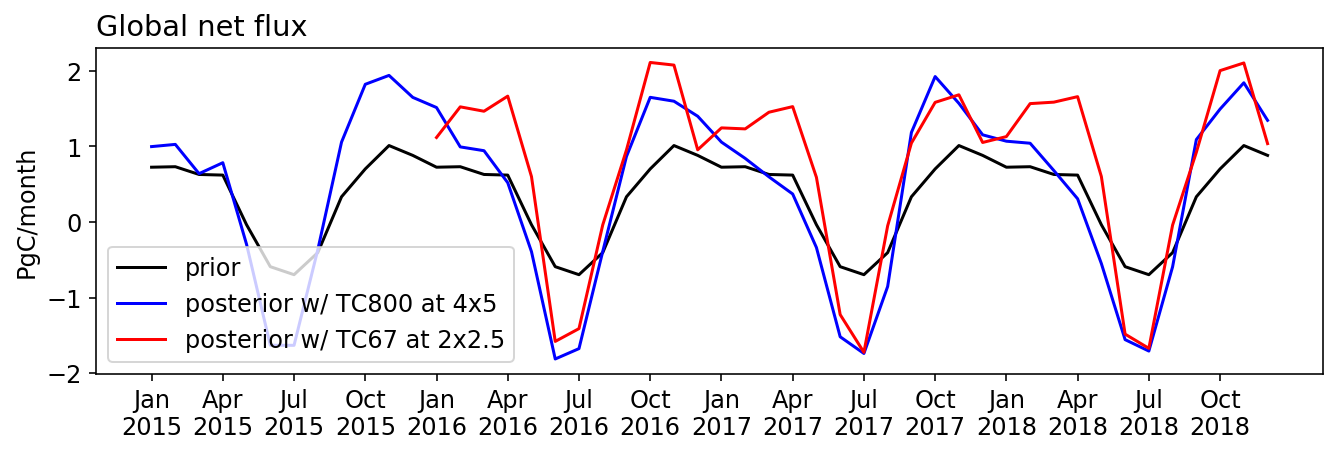

In [129]:
fig, ax = plt.subplots(figsize=[11, 3])

ax.plot(range(1,nm_years*12+1), np.tile(net_flux_2018, nm_years), label = 'prior', color = 'black')

ax.plot(range(1,nm_years*12+1), np.sum(monthly_regional_liang, axis =1), label = "posterior w/ TC800 at 4x5", color = 'blue')

post = np.tile(net_flux_2018 + update_array, nm_years-1)
for i in range(nm_years-1):
    scale_factor = 1+(nprd.random_sample(12)-0.5)/3
    post[i*12:(i+1)*12] = post[i*12:(i+1)*12] * scale_factor

ax.plot(range(13,nm_years*12+1), post, label = 'posterior w/ TC67 at 2x2.5', color = 'red')

plt.title('Global net flux', loc='left')
plt.ylabel('PgC/month')
plt.legend()

ticks = []
for iyear in range(nm_years):
    for imonth in range(1,13,3):
        ticks.append(short_name_of_month(imonth) + '\n' + str(iyear+first_year))
plt.xticks(range(1,nm_years*12+1,3), ticks)

fig.savefig(mod_dir + 'inversion_global_TC67.png', dpi = 300, bbox_inches='tight')


In [136]:
np.shape(monthly_regional_liang)

(48, 67)

In [139]:
g_4years = np.zeros(4)
for i in range(4):
    g_4years[i] = np.sum(monthly_regional_liang[i*12:(i+1)*12,:])
print(np.mean(g_4years))
print(np.std(g_4years))

4.9627977743219045
0.6839169411073127


In [142]:
np.sum(net_flux_2018+update_array)

8.645032462447045

In [119]:
# [12, nx]
monthly_regional_before = np.zeros((nm_years*12, nx))
for i in range(nm_years): 
    monthly_regional_before[i*12:(i+1)*12,:] = monthly_flux_rest + monthly_bio_flux

monthly_regional_after  = np.zeros((nm_years*12, nx))
for i in range(nm_years):
    for j in range(nx):
        monthly_regional_after[i*12:(i+1)*12,j] = monthly_flux_rest[:,j] + monthly_bio_flux[:,j] + update_matrix[:,j]*scale_factor

TC_monthly_regional_before = np.zeros((12*nm_years,23)) # 3 years, 23 transcom regions
TC_monthly_regional_after = np.zeros((12*nm_years,23)) # 23 transcom regions
TC_monthly_regional_liang = np.zeros((12*nm_years,23)) # 23 transcom regions

TC_monthly_regional_before[:,-12:] = monthly_regional_before[:,-12:]
TC_monthly_regional_after[:,-12:]  = monthly_regional_after[:,-12:]
TC_monthly_regional_liang[:,-12:]  = monthly_regional_liang[:,-12:]

for i in range(11):
    TC_monthly_regional_before[:,i] = np.sum(monthly_regional_before[:,i*5:(i+1)*5], axis = 1)
    TC_monthly_regional_after[:,i]  = np.sum(monthly_regional_after[:,i*5:(i+1)*5], axis = 1)
    TC_monthly_regional_liang[:,i]  = np.sum(monthly_regional_liang[:,i*5:(i+1)*5], axis = 1)



([<matplotlib.axis.XTick at 0x2b917523b8d0>,
 <a list of 16 Text xticklabel objects>)

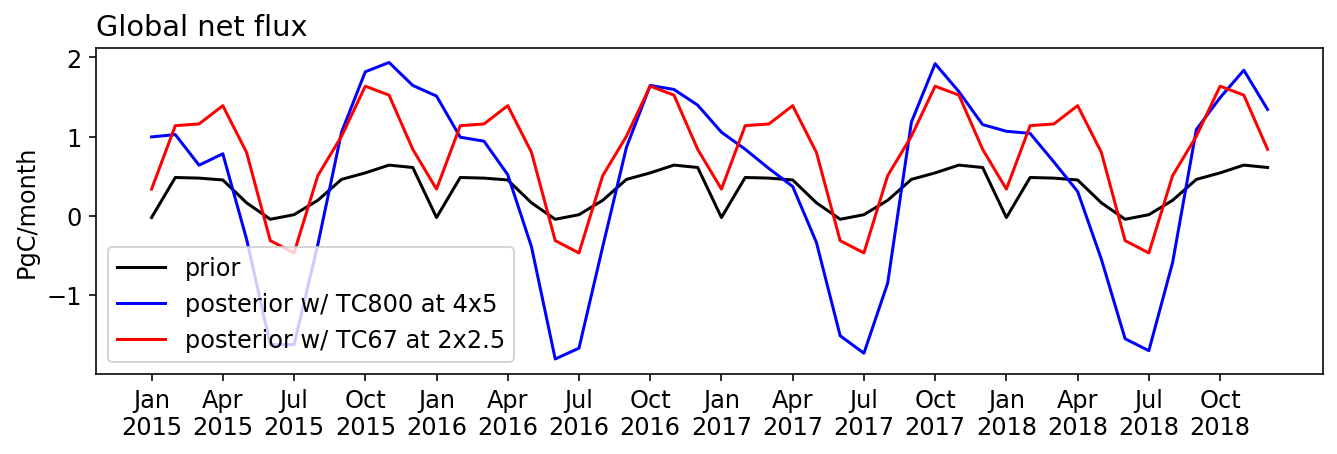

In [120]:
fig, ax = plt.subplots(figsize=[11, 3])

ax.plot(range(1,nm_years*12+1), np.sum(TC_monthly_regional_before, axis = 1), label = 'prior', color = 'black')

ax.plot(range(1,nm_years*12+1), np.sum(TC_monthly_regional_liang, axis =1), label = "posterior w/ TC800 at 4x5", color = 'blue')

#post = np.tile(net_flux_2018 + update_array, nm_years-1)
#for i in range(nm_years-1):
#    scale_factor = 1+(nprd.random_sample(12)-0.5)/3
#    post[i*12:(i+1)*12] = post[i*12:(i+1)*12] * scale_factor

#ax.plot(range(13,nm_years*12+1), post, label = 'posterior w/ TC67 at 2x2.5', color = 'red')
ax.plot(range(1,nm_years*12+1), np.sum(TC_monthly_regional_after, axis = 1), label = 'posterior w/ TC67 at 2x2.5', color = 'red')  

plt.title('Global net flux', loc='left')
plt.ylabel('PgC/month')
plt.legend()

ticks = []
for iyear in range(nm_years):
    for imonth in range(1,13,3):
        ticks.append(short_name_of_month(imonth) + '\n' + str(iyear+first_year))
plt.xticks(range(1,nm_years*12+1,3), ticks)

#fig.savefig(mod_dir + 'inversion_global_TC67.png', dpi = 300)

In [112]:
fname = 'regions.nc'
tmp = xr.open_dataset(fname)
region_names = []
for iregion in range(23):
    name = ''
    for i in range(25):
        name += (tmp['transcom_names'][iregion].values[i].decode("utf-8"))
    region_names.append(name.strip())
region_names

['North American Boreal',
 'North American Temperate',
 'South American Tropical',
 'South American Temperate',
 'Northern Africa',
 'Southern Africa',
 'Eurasia Boreal',
 'Eurasia Temperate',
 'Tropical Asia',
 'Australia',
 'Europe',
 'North Pacific Temperate',
 'West Pacific Tropical',
 'East Pacific Tropical',
 'South Pacific Temperate',
 'Northern Ocean',
 'North Atlantic Temperate',
 'Atlantic Tropical',
 'South Atlantic Temperate',
 'Southern Ocean',
 'Indian Tropical',
 'South Indian Temperate',
 'Not optimized']

Text(0.5, 0, 'month')

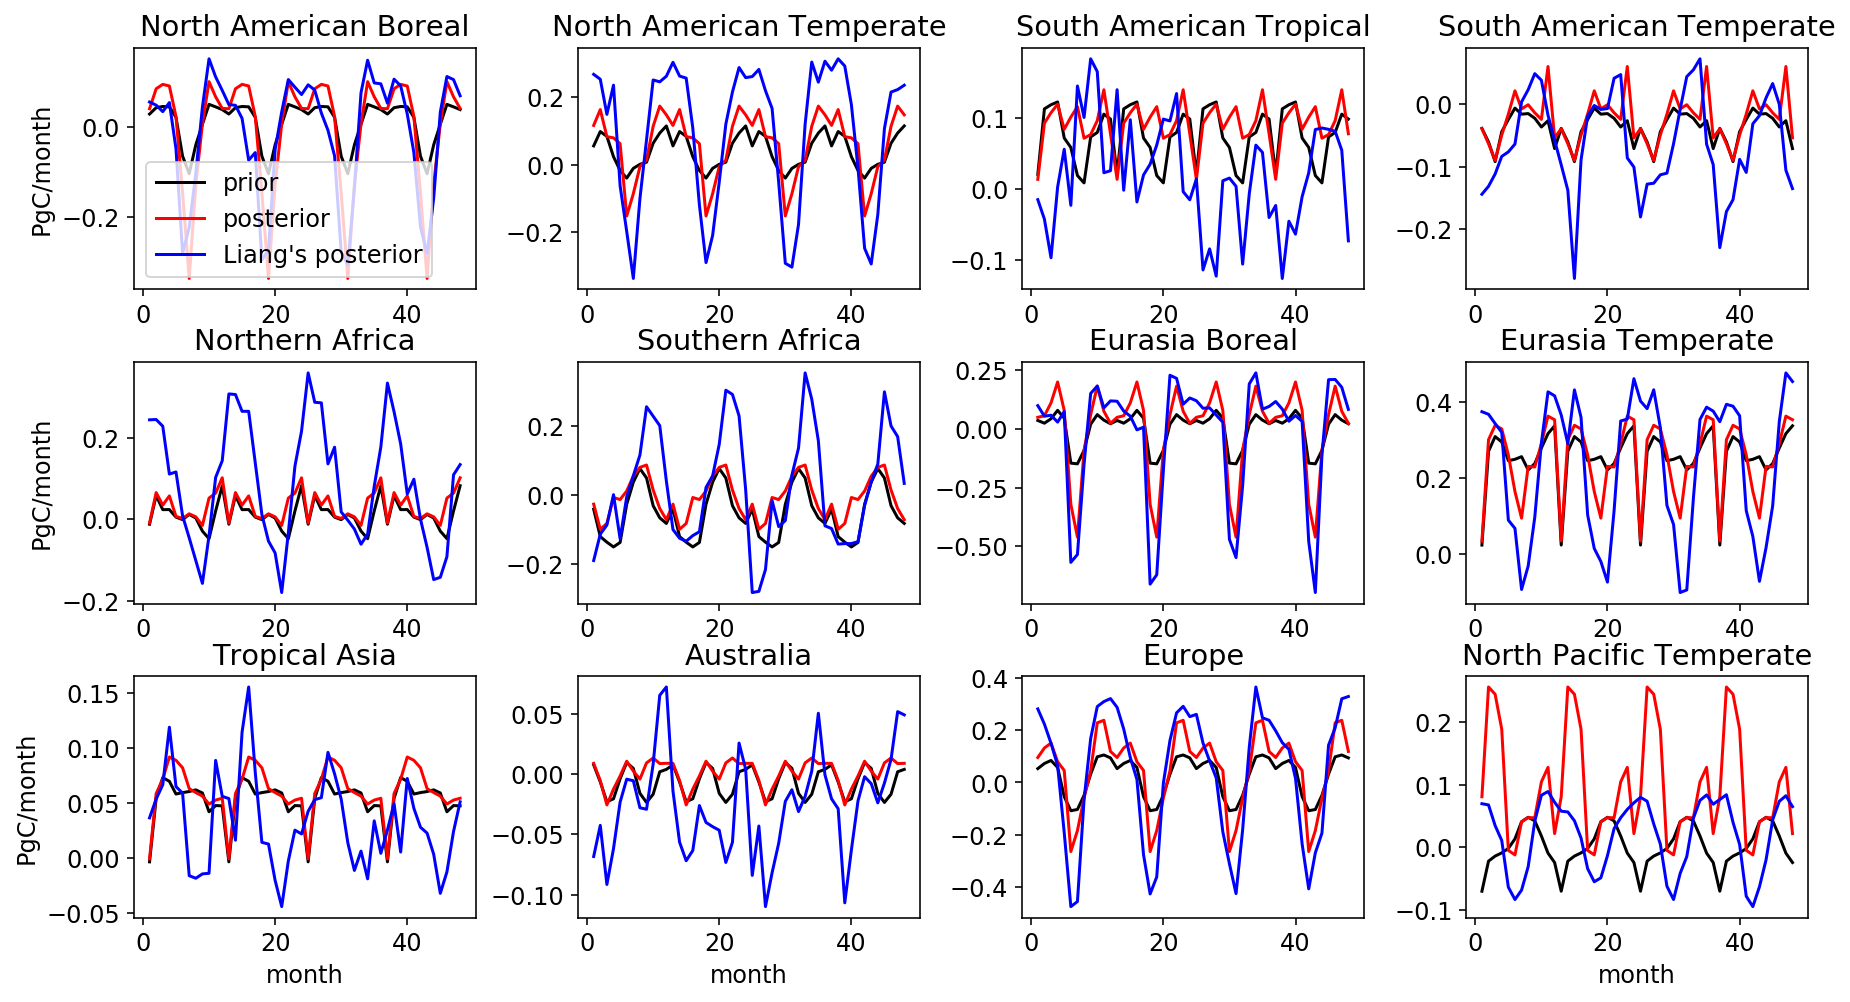

In [121]:
fig, axs = plt.subplots(3,4, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace= .3)

axs = axs.ravel()

for i in range(12):
    x = range(1,12*nm_years+1)

    # before
    y = TC_monthly_regional_before[:,i]
    axs[i].plot(x, y, label = "prior", color = 'black')
    
    # after
    y = TC_monthly_regional_after[:,i]
    axs[i].plot(x, y, label = 'posterior', color = 'r')
    axs[i].set_title(region_names[i])
    
    # Liang's posterior
    y = TC_monthly_regional_liang[:,i]
    axs[i].plot(x, y, label = "Liang's posterior", color = 'blue')
    
axs[0].set_ylabel('PgC/month')
axs[4].set_ylabel('PgC/month')
axs[8].set_ylabel('PgC/month')
axs[0].legend()

axs[8].set_xlabel('month')
axs[9].set_xlabel('month')
axs[11].set_xlabel('month')

#fig.savefig(fig_dir + 'inversion_regions1.png', dpi = 300)


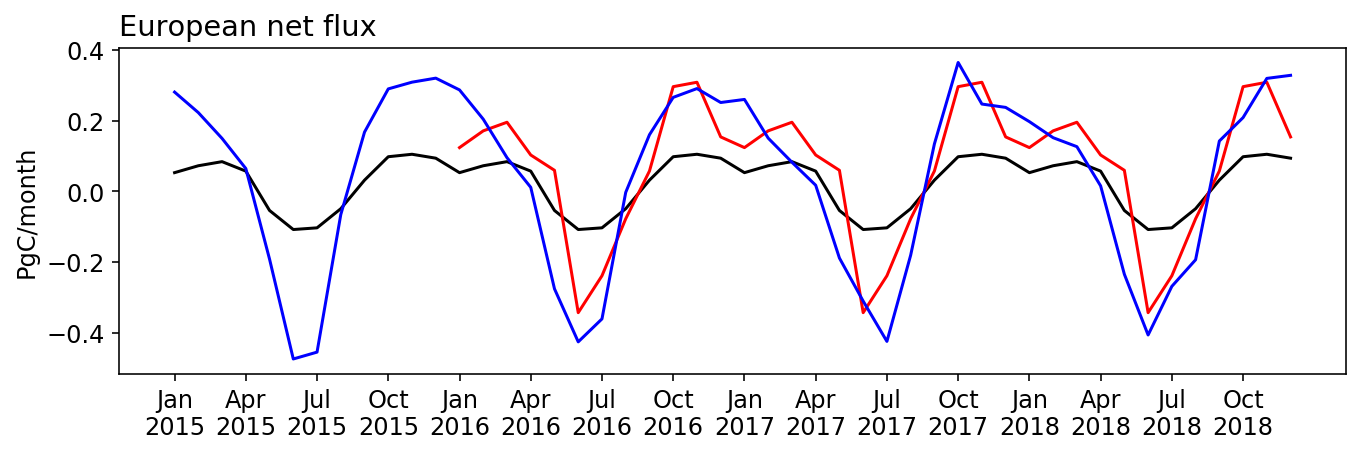

In [147]:
fig, ax = plt.subplots(figsize=[11, 3])
x = range(1,nm_years*12+1)
# before
y = TC_monthly_regional_before[:,10]
ax.plot(x, y, label = "prior", color = 'black')
    
# after
y = TC_monthly_regional_after[:,10]*1.3
ax.plot(x[-36:], y[-36:], label = 'posterior', color = 'r')
axs[i].set_title(region_names[i])
    
# Liang's posterior
y = TC_monthly_regional_liang[:,10]
ax.plot(x, y, label = "Liang's posterior", color = 'blue')
    
#ax.plot(range(1,nm_years*12+1),eu_before, label = 'prior', color = 'black')

#ax.plot(range(1,nm_years*12+1), eu_liang, label = "posterior w/ TC800 at 4x5", color = 'blue')

#ax.plot(range(1,nm_years*12+1), eu_after, label = 'posterior w/ TC67 at 2x2.5', color = 'red')

plt.title('European net flux', loc='left')
plt.ylabel('PgC/month')
#plt.legend()

ticks = []
for iyear in range(nm_years):
    for imonth in range(1,13,3):
        ticks.append(short_name_of_month(imonth) + '\n' + str(iyear+first_year))
plt.xticks(range(1,nm_years*12+1,3), ticks)

fig.savefig(mod_dir + 'inversion_eu.png', dpi = 300, bbox_inches='tight')

In [143]:
TC_monthly_regional_after[:,10]*1.3

array([ 0.12365712,  0.17098686,  0.19531861,  0.10278894,  0.05948045,
       -0.34278294, -0.23851539, -0.07745864,  0.05745678,  0.29589529,
        0.30834505,  0.15386176,  0.12365712,  0.17098686,  0.19531861,
        0.10278894,  0.05948045, -0.34278294, -0.23851539, -0.07745864,
        0.05745678,  0.29589529,  0.30834505,  0.15386176,  0.12365712,
        0.17098686,  0.19531861,  0.10278894,  0.05948045, -0.34278294,
       -0.23851539, -0.07745864,  0.05745678,  0.29589529,  0.30834505,
        0.15386176,  0.12365712,  0.17098686,  0.19531861,  0.10278894,
        0.05948045, -0.34278294, -0.23851539, -0.07745864,  0.05745678,
        0.29589529,  0.30834505,  0.15386176])

In [144]:
TC_monthly_regional_liang[:,10]

array([ 0.28060364,  0.22258805,  0.14959743,  0.06453048, -0.19161926,
       -0.47369546, -0.45431479, -0.06556803,  0.16755597,  0.28957681,
        0.30858569,  0.31995367,  0.28668859,  0.20391822,  0.09518053,
        0.01133228, -0.27547904, -0.42531265, -0.36040982, -0.00285953,
        0.16002978,  0.2655959 ,  0.29049093,  0.25111018,  0.25978797,
        0.15038711,  0.08230209,  0.01727378, -0.18842539, -0.31009235,
       -0.42404533, -0.18047985,  0.1340395 ,  0.3642692 ,  0.2467323 ,
        0.23730532,  0.19704334,  0.15167194,  0.126341  ,  0.01555779,
       -0.2342701 , -0.40589257, -0.26841621, -0.19328438,  0.14220646,
        0.20852946,  0.3192597 ,  0.32792557])

In [145]:
g_4years = np.zeros(4)
for i in range(4):
    g_4years[i] = np.sum(TC_monthly_regional_liang[i*12:(i+1)*12,10])
print(np.mean(g_4years))
print(np.std(g_4years))

0.47345147037532004
0.09514256506499638


In [146]:
g_4years = np.zeros(4)
for i in range(4):
    g_4years[i] = np.sum(TC_monthly_regional_after[i*12:(i+1)*12,10]*1.3)
print(np.mean(g_4years))
print(np.std(g_4years))

0.809033905498934
0.0
